# Multi-variable Linear_Regression

## 1. INPUT : 2 ( X1, X2)

In [1]:
import tensorflow as tf
import numpy as np

learning_rate = 0.01
training_cnt = 100
display_step = 10

X1 = np.array([1., 0., 3., 0., 5.])
X2 = np.array([0., 2., 0., 4., 0.])

Y = np.array([1., 2., 3., 4., 5.])

W1 = tf.Variable([.0], tf.float32, name = "weight1")
W2 = tf.Variable([.0], tf.float32, name = "weight2")
b = tf.Variable([.0], tf.float32, name = "bias")

for epoch in range(training_cnt):
    with tf.GradientTape() as tape:
      pred = X1 * W1 + X2 * W2 + b
      cost = tf.reduce_mean(tf.square(pred - Y))
    if (epoch+1) % display_step == 0: 
      print("Run_count : [%04d], Train_cost =[%.4f], W1 =[%.4f], W2 =[%.4f], b =[%.4f], pred =[%.4f %.4f %.4f %.4f %.4f]" 
        % (epoch+1, cost, W1, W2, b, pred[0], pred[1], pred[2], pred[3], pred[4] ))
    W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])
    W1.assign_sub(learning_rate * W1_grad)
    W2.assign_sub(learning_rate * W2_grad)
    b.assign_sub(learning_rate * b_grad)

print("Optimization Finished!") 
print("Run_count : [%04d], Train_cost =[%.4f], W1 =[%.4f], W2 =[%.4f], b =[%.4f], pred =[%.4f %.4f %.4f %.4f %.4f]" 
              % (epoch+1, cost, W1, W2, b, pred[0], pred[1], pred[2], pred[3], pred[4] ))

Run_count : [0010], Train_cost =[1.0022], W1 =[0.7019], W2 =[0.4965], b =[0.3238], pred =[1.0257 1.3167 2.4296 2.3097 3.8335]
Run_count : [0020], Train_cost =[0.1409], W1 =[0.8565], W2 =[0.7164], b =[0.4162], pred =[1.2726 1.8489 2.9856 3.2816 4.6986]
Run_count : [0030], Train_cost =[0.0509], W1 =[0.8823], W2 =[0.8041], b =[0.4340], pred =[1.3163 2.0422 3.0809 3.6504 4.8454]
Run_count : [0040], Train_cost =[0.0364], W1 =[0.8872], W2 =[0.8414], b =[0.4311], pred =[1.3183 2.1138 3.0927 3.7966 4.8671]
Run_count : [0050], Train_cost =[0.0324], W1 =[0.8897], W2 =[0.8587], b =[0.4218], pred =[1.3115 2.1392 3.0910 3.8567 4.8704]
Run_count : [0060], Train_cost =[0.0302], W1 =[0.8924], W2 =[0.8680], b =[0.4105], pred =[1.3029 2.1466 3.0877 3.8826 4.8726]
Run_count : [0070], Train_cost =[0.0284], W1 =[0.8953], W2 =[0.8741], b =[0.3987], pred =[1.2940 2.1468 3.0847 3.8949 4.8754]
Run_count : [0080], Train_cost =[0.0267], W1 =[0.8983], W2 =[0.8787], b =[0.3869], pred =[1.2853 2.1443 3.0820 3.9016 

#### 트레이닝 데이터 변수 선언
- 입력으로 들어가는 x1, x2 즉 두개의 변수 선언
- 출력은 하나 Y data

In [ ]:
X1 = np.array([1., 0., 3., 0., 5.])
X2 = np.array([0., 2., 0., 4., 0.])

Y = np.array([1., 2., 3., 4., 5.])

#### set model weight
- 입력변수가 2개이기 때문에 weight도 2개로 늘어난다.

In [ ]:
W1 = tf.Variable([.0], tf.float32, name = "weight1")
W2 = tf.Variable([.0], tf.float32, name = "weight2")
b = tf.Variable([.0], tf.float32, name = "bias")

#### linear model(예측 값 구현)

$$H(x_1,x_2)=x_1w_1+x_2w_2+b$$

In [ ]:
pred = X1 * W1 + X2 * W2 + b

#### cost/loss function 구현

$$cost(W,b)=\frac 1m\sum_{i=1}^m(H(x_1^{(i)},x_2^{(i)})-y^{(i)})^2$$

In [ ]:
cost = tf.reduce_mean(tf.pow(pred-Y, 2))

#### 학습방법 -> cost를 최소화
- gradient decent 함수 사용(경사 하강법) 
-  파라미터 $W1$,  $W2$,  $b$ 에 대해 손실을 미분하는 과정으로, 파라미터를 증가시킬 때 손실이 얼마나 변화하는지를 알아본다. 
- with tf.GradientTape() as tape: 안에서 계산을 하면 tape에 계산 과정을 기록해두었다가 tape.gradient를 이용해서 미분을 자동으로 구할 수 있다

In [ ]:
with tf.GradientTape() as tape:
  pred = X1 * W1 + X2 * W2 + b
  cost = tf.reduce_mean(tf.square(pred - Y))
W1_grad, W2_grad, b_grad = tape.gradient(cost, [W1, W2, b])

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([0.06], dtype=float32)>

- $w←w−η∂w$ 의 식으로 파라미터를 수정
- $η$ 는 학습률
- 경사(미분)을 따라 손실을 줄여나가기 때문에 경사하강법이라고 부름
- a.assign_sub(b)는 a = a - b 와 같다

In [ ]:
W1.assign_sub(learning_rate * W1_grad)
W2.assign_sub(learning_rate * W2_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=(1,) dtype=float32, numpy=array([0.361896], dtype=float32)>

## 2. INPUT : 2 ( matrix 이용)

In [ ]:
learning_rate = 0.01
training_cnt = 10
display_step = 1

MX = np.array([[1., 0.], [0., 2.], [3., 0.], [0., 4.], [5., 0.] ], dtype= np.float32) # matmul 연산을 위해 dtype 통일 
Y = np.array([[1.], [2.], [3.], [4.], [5.]])

W = tf.Variable(tf.zeros([2, 1]), tf.float32,name='weight')
b = tf.Variable(tf.zeros([1]), tf.float32, name='bias')

for epoch in range(training_cnt):
    with tf.GradientTape() as tape:
      pred = tf.matmul(MX ,W) + b
      cost = tf.reduce_mean(tf.square(pred - Y))
    if (epoch+1) % display_step == 0: 
      print("Run_count : [%04d], Train_cost =[%.4f], W =[%.4f %.4f], b =[%.4f], pred =[%.4f %.4f %.4f %.4f %.4f]" 
          % (epoch+1, cost, W[0], W[1], b, pred[0], pred[1], pred[2], pred[3], pred[4] ))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

print("Optimization Finished!") 
print("Run_count : [%04d], Train_cost =[%.4f], W = [%.4f %.4f], b =[%.4f], pred =[%.4f %.4f %.4f %.4f %.4f]" 
              % (epoch+1, cost, W[0], W[1], b, pred[0], pred[1], pred[2], pred[3], pred[4] ))

Run_count : [0001], Train_cost =[11.0000], W =[0.0000 0.0000], b =[0.0000], pred =[0.0000 0.0000 0.0000 0.0000 0.0000]
Run_count : [0002], Train_cost =[8.2482], W =[0.1400 0.0800], b =[0.0600], pred =[0.2000 0.2200 0.4800 0.3800 0.7600]
Run_count : [0003], Train_cost =[6.2131], W =[0.2582 0.1522], b =[0.1118], pred =[0.3701 0.4162 0.8866 0.7205 1.4030]
Run_count : [0004], Train_cost =[4.7033], W =[0.3581 0.2173], b =[0.1567], pred =[0.5147 0.5913 1.2308 1.0259 1.9470]
Run_count : [0005], Train_cost =[3.5794], W =[0.4423 0.2762], b =[0.1954], pred =[0.6377 0.7477 1.5223 1.3001 2.4069]
Run_count : [0006], Train_cost =[2.7396], W =[0.5133 0.3294], b =[0.2290], pred =[0.7423 0.8877 1.7690 1.5465 2.7956]
Run_count : [0007], Train_cost =[2.1096], W =[0.5732 0.3775], b =[0.2580], pred =[0.8312 1.0131 1.9777 1.7681 3.1241]
Run_count : [0008], Train_cost =[1.6348], W =[0.6237 0.4211], b =[0.2831], pred =[0.9068 1.1254 2.1542 1.9677 3.4016]
Run_count : [0009], Train_cost =[1.2755], W =[0.6662 0.

#### matrix를 이용한 구축

$$H(x_1,x_2)=x_1w_1+x_2w_2+b$$

$$( x_1 \  \ x_2) * {w_1 \choose w_2} = ( x_1w_1 + x_2w_2)$$

# 연습문제

## input3개
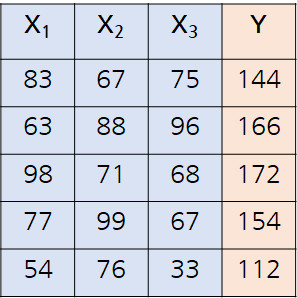